### 1) Generating list of words (with or without mistypes)

We will generate a dataset with 3 words in total: 'apple', 'awesome' and 'orange'. Each instance can have a mistype or not.

In [1]:
# generating list
list_of_words = ["Apple", "  aple", "appple ", "appl", "sppl", "apple", "apple ", # Apple
                "awesome", "awesom", " AWESOME ", "awesum", "aewsome", " wwesime", # Awesome
                "Orange", "oragne  ", "oarnge", " orznge", "orngae ", "ORANGE", "oragne"] # Orange

# standardizing strings: .strip() and .lower() or .upper()
list_of_words = [string.strip().lower() for string in list_of_words]

# if your list of words have a lot of repeated instances, then it is
# recommended to run the following line of code:
list_of_words = list(set(list_of_words))

# printing list
list_of_words

['awesum',
 'awesom',
 'appple',
 'apple',
 'wwesime',
 'orange',
 'sppl',
 'appl',
 'awesome',
 'aple',
 'oragne',
 'orznge',
 'oarnge',
 'aewsome',
 'orngae']

### 2) Calculating distance between strings

We will get every combination of strings in pairs and calculate the distance between them.

In [2]:
import numpy as np
from itertools import combinations
from jellyfish import damerau_levenshtein_distance
# https://jamesturk.github.io/jellyfish/functions/

# list to store the distances between each pair of strings
dist_array = []

# for each pair of strings: calculate the distance between them
for combination in combinations(list_of_words, 2):
    
    # taking each string from combination
    string1, string2 = combination
    
    # calculating the distance between them and append it to dist_array
    dist_array.append(damerau_levenshtein_distance(string1, string2))

# transforming dist_array to numpy array
dist_array = np.array(dist_array)

# printing dist_array
dist_array

array([1, 5, 5, 3, 6, 6, 5, 2, 5, 6, 6, 6, 3, 6, 5, 5, 3, 6, 6, 5, 1, 5,
       6, 6, 6, 2, 6, 1, 6, 5, 3, 2, 5, 2, 5, 5, 5, 5, 5, 6, 5, 2, 1, 5,
       1, 5, 5, 4, 5, 5, 6, 6, 7, 2, 6, 6, 6, 6, 3, 6, 6, 5, 6, 4, 1, 1,
       1, 6, 2, 1, 6, 3, 6, 6, 6, 6, 6, 6, 2, 5, 6, 5, 6, 6, 5, 6, 6, 6,
       1, 6, 4, 5, 4, 5, 5, 2, 2, 6, 2, 2, 6, 2, 6, 2, 6])

### 3) Performing linkage using Damerau-Levenshtein distance

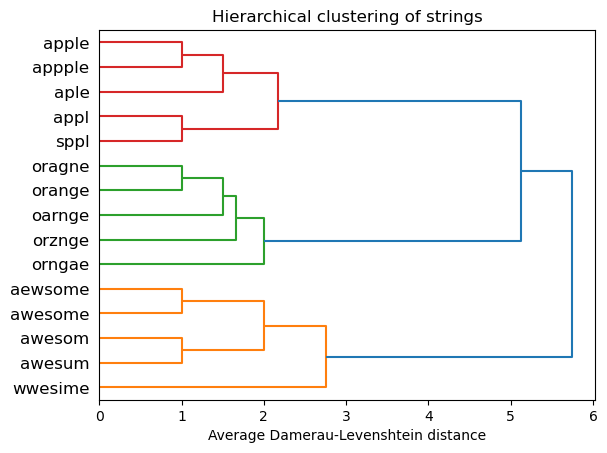

In [3]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# computing all the possible linkages (hierarchical clustering)
Z = linkage(dist_array, method="average")
# list of methods:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

dendrogram(Z, labels=list_of_words, orientation="right", leaf_font_size=12)
plt.gca().set(title="Hierarchical clustering of strings",
             xlabel="Average Damerau-Levenshtein distance")
plt.show()

### 4) Generating clusters by thresholding over the average Damerau-Levenshtein distance

In [4]:
import pandas as pd
from scipy.cluster.hierarchy import fcluster

# generating list of clusters
list_of_clusters = fcluster(Z, t=3, criterion="distance")

# saving unique strings and respective cluster as a dataframe
data = pd.DataFrame({"string": list_of_words,
                    "cluster": list_of_clusters}).sort_values("cluster")

# printing final dataframe
data

,string,cluster
0,awesum,1
1,awesom,1
4,wwesime,1
8,awesome,1
13,aewsome,1
5,orange,2
10,oragne,2
11,orznge,2
12,oarnge,2
14,orngae,2
